In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
#before executing these commands make sure that you have csv files containing urls for each object in the classes list are present in main_folder_name folder
#csv file with urls must be saved with the name 'urls_<classes-object>.csv'
main_folder_name = 'aircraft_diff'
path = Path('data/'+main_folder_name)
#print(path)
classes = ['airbus','boeing']                     #this classes variable is being refereed above
for folder in classes:
    file = 'urls_' + folder + '.csv'
    print(file)
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    print('Downloading images of-----> ' + folder.upper() + ' <-----')
    download_images(path/file, dest, max_pics=200)
    print('Verifying images of-----> ' + folder.upper() + ' <-----')
    verify_images(path/folder, delete=True, max_size=500)

urls_airbus.csv


Verifying images of-----> AIRBUS <-----


cannot identify image file <_io.BufferedReader name='data/aircraft_diff/airbus/00000153.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/airbus/00000126.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/airbus/00000145.jpg'>


/opt/anaconda3/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


cannot identify image file <_io.BufferedReader name='data/aircraft_diff/airbus/00000103.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/airbus/00000148.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/airbus/00000106.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/airbus/00000029.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/airbus/00000013.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/airbus/00000021.png'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/airbus/00000138.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/airbus/00000123.jpg'>
urls_boeing.csv


Error https://www.boeing.com.au/resources/images/common-news-release/2019/124A0318_banner.jpg HTTPSConnectionPool(host='www.boeing.com.au', port=443): Max retries exceeded with url: /resources/images/common-news-release/2019/124A0318_banner.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://www.boeing.co.in/resources/en-in/media/BoeingIndia/Home/Aero-India-home-banner.jpg HTTPSConnectionPool(host='www.boeing.co.in', port=443): Max retries exceeded with url: /resources/en-in/media/BoeingIndia/Home/Aero-India-home-banner.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://www.washingtonpost.com/resizer/BAUKoypD03Keg_MgOOsqfULppyw=/1484x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/56FE2SSQYEI6TPNXIT4URTAGAU.jpg HTTPSConnectionPool(host='www.washingtonpost.com', por

cannot identify image file <_io.BufferedReader name='data/aircraft_diff/boeing/00000171.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/boeing/00000039.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/boeing/00000118.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/boeing/00000121.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/boeing/00000196.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/boeing/00000164.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/boeing/00000047.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/boeing/00000108.jpg'>
cannot identify image file <_io.BufferedReader name='data/aircraft_diff/boeing/00000099.jpg'>


In [4]:
path.ls()

[PosixPath('data/aircraft_diff/urls_boeing.csv'),
 PosixPath('data/aircraft_diff/airbus'),
 PosixPath('data/aircraft_diff/urls_airbus.csv'),
 PosixPath('data/aircraft_diff/boeing'),
 PosixPath('data/aircraft_diff/.ipynb_checkpoints')]

In [ ]:
ImageDataBunch.from_folder?

In [5]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=32).normalize(imagenet_stats)

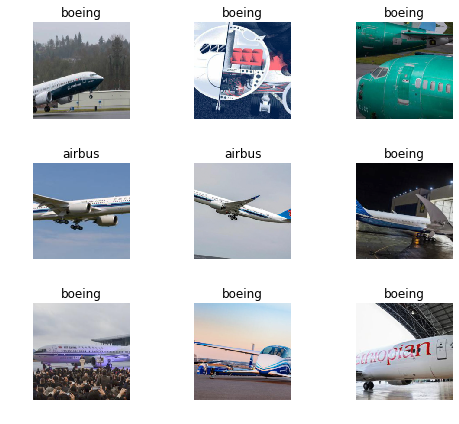

In [6]:
data.show_batch(rows=3, figsize=(7,6))

In [7]:
data.classes,data.c

(['airbus', 'boeing'], 2)

In [8]:
len(data.train_ds), len(data.valid_ds)

(296, 74)

In [ ]:
cnn_learner?

In [9]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

In [10]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.820377,0.605683,0.270270,00:07
1,0.717961,0.866640,0.364865,00:03
2,0.633301,0.811132,0.324324,00:03
3,0.551704,0.779757,0.310811,00:03


In [12]:
learn.save('stage-1')

In [13]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.363576,0.752918,0.310811,00:03
1,0.323882,0.749039,0.270270,00:03


In [14]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (296 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
airbus,airbus,airbus,airbus,airbus
Path: data/aircraft_diff;

Valid: LabelList (74 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boeing,boeing,boeing,airbus,boeing
Path: data/aircraft_diff;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


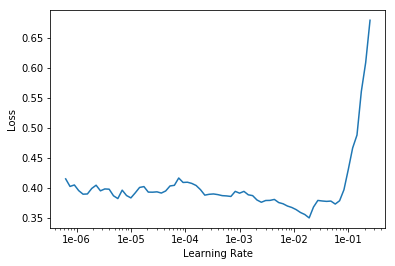

In [16]:
learn.recorder.plot()

In [ ]:

?learn.fit_one_cycle

In [17]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-3,2e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.993345,11725.076172,0.554054,00:05
1,0.906177,151.155228,0.459459,00:04


In [19]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(5,max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.529829,1.878640,0.364865,00:04
1,0.670349,2.363484,0.283784,00:04
2,0.597330,1.522403,0.297297,00:04
3,0.503024,0.753295,0.324324,00:04
4,0.426453,0.562752,0.202703,00:04


In [20]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (296 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
airbus,airbus,airbus,airbus,airbus
Path: data/aircraft_diff;

Valid: LabelList (74 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boeing,boeing,boeing,airbus,boeing
Path: data/aircraft_diff;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
?interp

In [22]:
losses, indices = interp.top_losses()

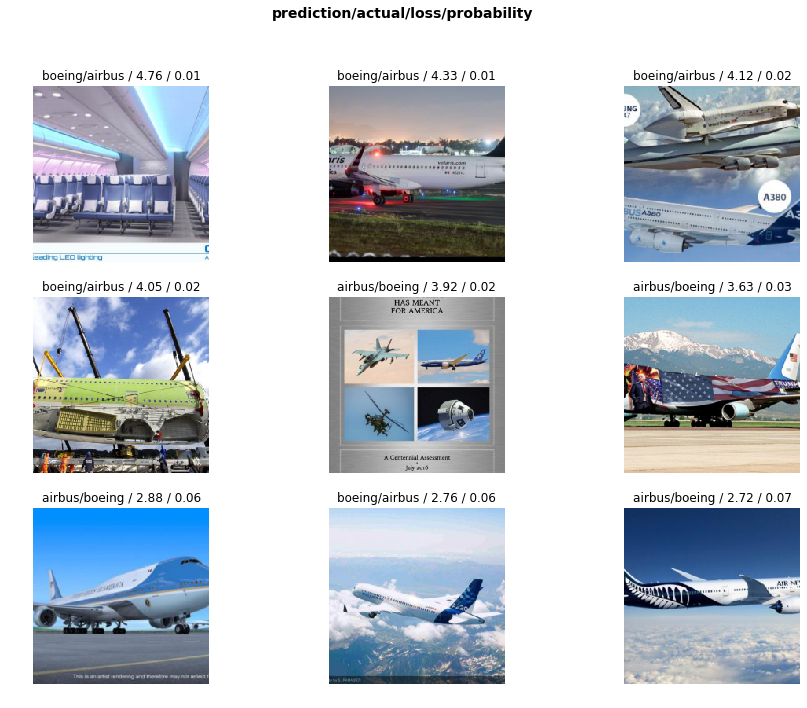

In [23]:
interp.plot_top_losses(9, figsize=(15,11), heatmap = False)

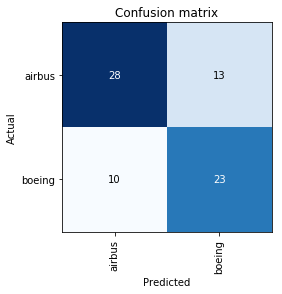

In [24]:
interp.plot_confusion_matrix()

In [25]:
from fastai.widgets import *

In [26]:
losses, idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [27]:
len(top_loss_paths)

74

In [28]:
#we create a new data bunch beacuse in our earlier data bunch named "data",we split our dataset into train & valid
#In this new data bunch we have all our images without any split so we can clean our entire dataset at once
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [29]:
#we first need to create another learner for our new databunch 
#which will train on whole dataset and suggest most losses
#but we will load weights from our earlier learner which saves us time
#learn_cln means learner_clean

learn_cln = cnn_learner(db, models.resnet50, metrics=error_rate)

learn_cln.load('stage-1');

In [30]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [31]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [32]:
path.ls()

[PosixPath('data/aircraft_diff/cleaned.csv'),
 PosixPath('data/aircraft_diff/urls_boeing.csv'),
 PosixPath('data/aircraft_diff/models'),
 PosixPath('data/aircraft_diff/airbus'),
 PosixPath('data/aircraft_diff/urls_airbus.csv'),
 PosixPath('data/aircraft_diff/boeing'),
 PosixPath('data/aircraft_diff/.ipynb_checkpoints')]

In [35]:
#we create a new data bunch beacuse in our earlier data bunch named "db",we cleaned only the top losses;
#there still may be duplicate images
#whenever we use ImageCleaner, the widget creates a cleaned.csv files reflecting our changes
db = (ImageList.from_csv(path,'cleaned.csv')
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [34]:
ImageList.from_csv?

In [38]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [39]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [43]:
?ImageDataBunch.from_csv

In [45]:
#we finally create a databunch which is free of duplicate and unwanted images from a csv file called 'cleaned.csv'
#this file is created and updated each time ImageCleaner is called.
data_clnd = ImageDataBunch.from_csv(path,csv_labels='cleaned.csv', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4, bs=32).normalize(imagenet_stats)     

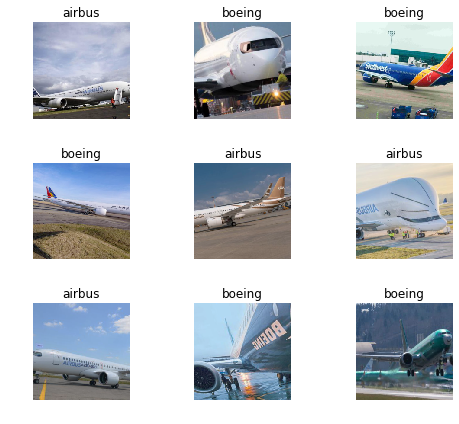

In [47]:
data_clnd.show_batch(rows=3, figsize=(7,6))

In [48]:
data_clnd.c,data_clnd.classes

(2, ['airbus', 'boeing'])

In [54]:
learn_after_cln = cnn_learner(data_clnd, models.resnet50, metrics=error_rate)

In [55]:
learn_after_cln.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

In [56]:
learn_after_cln.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.989410,0.799648,0.375000,00:04
1,0.777898,0.692699,0.305556,00:04


In [57]:
learn_after_cln.save('s1')

In [58]:
learn_after_cln.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.398788,0.690860,0.263889,00:04


In [59]:
learn_after_cln.save('s2')

In [60]:
learn_after_cln.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.292791,0.804023,0.319444,00:03
1,0.287035,0.784430,0.319444,00:04


In [61]:
learn_after_cln.load('s2')

Learner(data=ImageDataBunch;

Train: LabelList (292 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
airbus,airbus,airbus,airbus,airbus
Path: data/aircraft_diff;

Valid: LabelList (72 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
airbus,boeing,airbus,boeing,boeing
Path: data/aircraft_diff;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

In [62]:
learn_after_cln.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


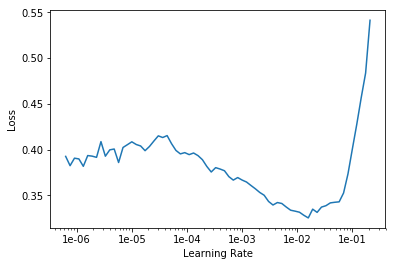

In [63]:
learn_after_cln.recorder.plot()

In [67]:
learn_after_cln.load('s2')
learn_after_cln.unfreeze()
learn_after_cln.fit_one_cycle(2,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.390581,0.674432,0.319444,00:04
1,0.334452,0.671447,0.263889,00:04


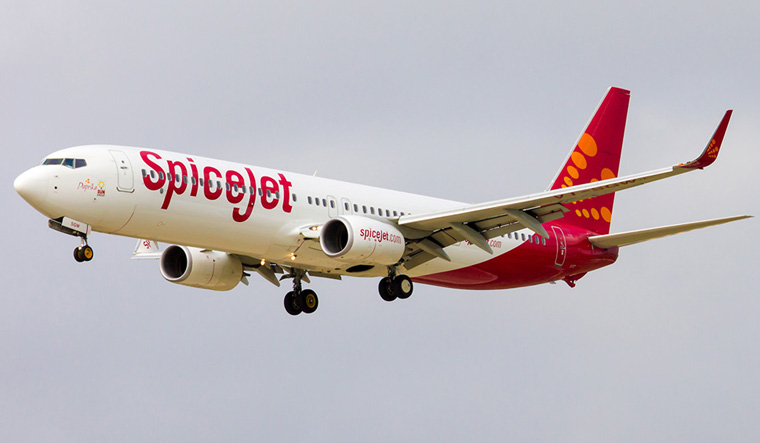

In [99]:
pred_file_path = Path('data/aircraft_diff')
pfile = 'myimg.jpg'
img = open_image(pred_file_path/'myimg.jpg')
img

In [100]:
learn_after_cln.predict(img)

(Category boeing, tensor(1), tensor([0.4893, 0.5107]))